$$Importing\;neccessary\;libraries$$

In [0]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import random as rd
import math

$$Input\;image\;for\;clustering\;the\;pixels:$$

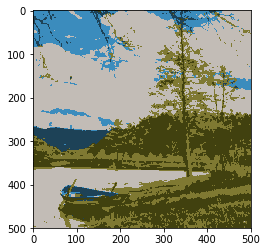

In [23]:
data=cv2.imread('kmeans.png')
plt.imshow(data[:,:,[2,1,0]])

$$
Data\;preprocessing:
$$

In [0]:
data_matrix=list()
for i in range(np.shape(data)[0]):
  for j in range(np.shape(data)[1]):
    data_matrix.append(data[i][j])
    
data_matrix=np.transpose(data_matrix)

$$Functions\;for\;euclidean\;distance,updating\;centriods,Kmeans\; clustering$$

In [0]:
def euclidean_distance(center,point):
  distance=0;
  for i in range(np.shape(center)[0]):
    distance+=(center[i]-point[i])**2
  return np.sqrt(distance)

In [0]:
def update(cluster):
  return np.mean(cluster,axis=0)

In [0]:
#data_matrix size->dxN
#centriods size->Kxd
def K_means_clustering(data_matrix,K,e):
  #generate random centriod
  centriods=list()
  for i in range(K):
    centriod=list()
    for j in range(np.shape(data_matrix)[0]):
      a=rd.uniform(1,150)
      centriod.append(a)
    centriods.append(centriod)
  
  print('centriods initially:')
  print(centriods)
  
  err=math.inf
  clus=list()
  #finding the appropriate clusters for each data point
  while(err>=e):
    #create K empty clusters
    clusters=list()
    for i in range(K):
      cluster=list()
      clusters.append(cluster)
    
    #creating lists of indexes which are used in recoloring the image.
    indexes=list()
    for i in range(K):
      index=list()
      indexes.append(index)
      
    for i in range(np.shape(data_matrix)[1]):
      index=0
      D=math.inf
      for j in range(np.shape(centriods)[0]):
        d=euclidean_distance(data_matrix[:,i],centriods[j])
        if min(d,D)==d:
          index=j
          D=d
      clusters[index].append(data_matrix[:,i])
      indexes[index].append(i);
        

    error=0
    for i in range(K):
      if clusters[i]!=[]:
        centriod1=update(clusters[i])
        error+=np.square(euclidean_distance(centriod1,centriods[i]))
        centriods[i]=centriod1
    print('error: ',end='')
    print(error)
    err=error
    print('updated centriods:',end='')
    print(centriods)
    if err<e:
      clus=clusters
      
      
  return (err,centriods,clus,indexes)
      

      
    

$$Applying\;kmeans\;clustering\;on\;image\; pixels\;data:\;Creating\;three\;clusters\;with\;0.01\;as\;threshold\;for\;error.$$

In [28]:
K=3
threshold=0.01
(error,centriods,clusters,indexes)=K_means_clustering(data_matrix,K,threshold)

centriods initially:
[[127.4748846970005, 24.989466784468597, 108.48312580264066], [11.639617892673437, 13.06780582660901, 135.21710477723818], [35.06930382992919, 122.92117724711159, 92.50283945026186]]
error: 20278.213889598956
updated centriods:[array([157.1510945 , 116.8939313 ,  49.63267485]), [11.639617892673437, 13.06780582660901, 135.21710477723818], array([104.46373321, 137.73808291, 142.02659904])]
error: 10701.062870688611
updated centriods:[array([157.1510945 , 116.8939313 ,  49.63267485]), array([15., 65., 65.]), array([140.16739655, 166.76678461, 172.76678461])]
error: 5701.05279905443
updated centriods:[array([189., 140.,  59.]), array([35.39916181, 87.72079958, 86.93254905]), array([182., 188., 194.])]
error: 0.0
updated centriods:[array([189., 140.,  59.]), array([35.39916181, 87.72079958, 86.93254905]), array([182., 188., 194.])]


$$Assigning\;unique\;colors\;to\;the\;pixels\;which\;are\;clustered$$

Orginal image:


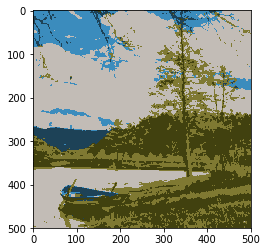

Image after K-clustering:


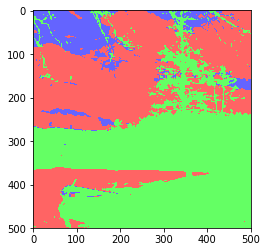

In [29]:
print("Orginal image:")
plt.imshow(data[:,:,[2,1,0]])
plt.show()

indexes=np.array(indexes)
for i in range(np.shape(indexes)[0]):
  for j in range(np.shape(indexes[i])[0]):
    r=int(indexes[i][j]/np.shape(data)[0])
    c=indexes[i][j]-np.shape(data)[1]*r
    if i==0:
      data[r][c][0]=255
      data[r][c][1]=100
      data[r][c][2]=100
    if i==1:
      data[r][c][0]=100
      data[r][c][1]=255
      data[r][c][2]=100
    if i==2:
      data[r][c][0]=100
      data[r][c][1]=100
      data[r][c][2]=255

print("Image after K-clustering:")
plt.imshow(data[:,:,[2,1,0]])